In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("./Datasets/train.csv")
df.shape

(42000, 785)

In [3]:
df.sample(5)

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7   
3479       2       0       0       0       0       0       0       0       0  \
9959       2       0       0       0       0       0       0       0       0   
20320      7       0       0       0       0       0       0       0       0   
10777      5       0       0       0       0       0       0       0       0   
35895      9       0       0       0       0       0       0       0       0   

       pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778   
3479        0  ...         0         0         0         0         0  \
9959        0  ...         0         0         0         0         0   
20320       0  ...         0         0         0         0         0   
10777       0  ...         0         0         0         0         0   
35895       0  ...         0         0         0         0         0   

       pixel779  pixel780  pixel781  pixel782  pixel783  
3479          0         0         0         0         0  
9959          0         0         0         0         0  
20320         0         0         0         0         0  
10777         0         0         0         0         0  
35895         0         0         0         0         0  

[5 rows x 785 columns]

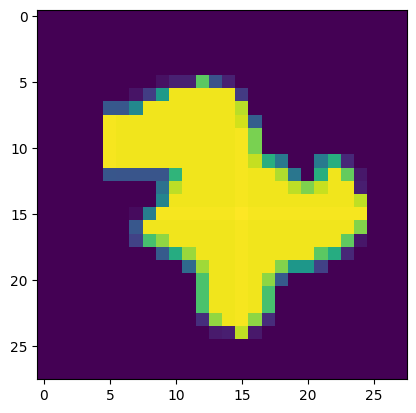

In [24]:
import matplotlib.pyplot as plt

plt.imshow(df.iloc[679,1:].values.reshape(28,28))

In [4]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [5]:
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

X_train.shape

(33600, 784)

In [13]:
from sklearn.neighbors import  KNeighborsClassifier

knn = KNeighborsClassifier()

In [14]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [15]:
# Below process is time consuming as in it 1 point would be compare with the 36599 point, so in this case PCA come into picture.

y_pred = knn.predict(X_test)

In [16]:
from sklearn.metrics import  accuracy_score
accuracy_score(y_test, y_pred)

0.9648809523809524

# Using PCA

In [38]:
# Step 1: standardized data 
from sklearn.preprocessing import  StandardScaler
scaler = StandardScaler()

In [39]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
# step 2: PCA
from sklearn.decomposition import  PCA

# If we pass n_components=None then components will be same clm in data, we can change it accordingly
pca = PCA(n_components=200)

In [44]:
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [46]:
X_train_trf.shape

(33600, 200)

In [47]:
knn = KNeighborsClassifier()

In [48]:
knn.fit(X_train_trf, y_train)

KNeighborsClassifier()

In [49]:
y_pred = knn.predict(X_test_trf)

In [50]:
accuracy_score(y_test, y_pred)

0.9502380952380952

##### To get best value for n_components 

In [52]:
for i in range(1, 785):
    pca = PCA(n_components=i)
    X_train_trf = pca.fit_transform(X_train)
    X_test_trf = pca.transform(X_test)
    knn = KNeighborsClassifier()
    knn.fit(X_train_trf, y_train)
    y_pred = knn.predict(X_test_trf)
    print(f"Accuracy for {i} components is {accuracy_score(y_test, y_pred)}")

Accuracy for 1 components is 0.25797619047619047
Accuracy for 2 components is 0.32416666666666666
Accuracy for 3 components is 0.5103571428571428
Accuracy for 4 components is 0.6663095238095238
Accuracy for 5 components is 0.7377380952380952
Accuracy for 6 components is 0.8223809523809524
Accuracy for 7 components is 0.844047619047619
Accuracy for 8 components is 0.8721428571428571
Accuracy for 9 components is 0.8866666666666667
Accuracy for 10 components is 0.9053571428571429
Accuracy for 11 components is 0.9119047619047619
Accuracy for 12 components is 0.9179761904761905
Accuracy for 13 components is 0.9266666666666666
Accuracy for 14 components is 0.9355952380952381
Accuracy for 15 components is 0.9395238095238095


#### Transforming to a 2D coordinate syster

In [8]:
pca = PCA(n_components=2)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [9]:
X_train_trf

array([[-226.60137472,  305.93526052],
       [  38.33498437, -461.0912969 ],
       [-305.49419486, -351.68644856],
       ...,
       [ -28.00070267,  596.07137499],
       [ 233.97493686,   18.69100865],
       [1096.50235245, -254.74192747]])

In [12]:
import plotly.express as px

y_train_trf = y_train.astype(str)
fig = px.scatter(x=X_train_trf[:,0], y= X_train_trf[:,1], color=y_train_trf, color_discrete_sequence=px.colors.qualitative.G10)
fig.show()

#### Transforming to a 3D coordinate syster

In [13]:
pca  =PCA(n_components=3)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [14]:
X_train_trf

array([[-226.60570351,  305.89525792,  417.13960672],
       [  38.3344815 , -461.07983626,  100.38425612],
       [-305.49274179, -351.66003011, -961.31142751],
       ...,
       [ -28.00235347,  596.07353842,  606.20486423],
       [ 233.97088764,   18.6396591 , -148.24698175],
       [1096.50497588, -254.73216009, -560.24955088]])

In [15]:
y_train_trf = y_train.astype(str)
fig = px.scatter_3d(df, x=X_train_trf[:,0], y=X_train_trf[:,1], z=X_train_trf[:,2], color=y_train_trf)
fig.update_layout(margin=dict(l=20, r=20, t=20, b=20))
fig.show()

In [17]:
# this gives eigen values
pca.explained_variance_

array([335506.57620438, 244807.10505298, 212051.03193676])

In [18]:
pca.components_.shape

(3, 784)

In [19]:
# explained_variance_ratio_: Percentage of variance explained by each of the selected components.
pca.explained_variance_ratio_

array([0.09770722, 0.07129345, 0.06175413])

### Finding optimum value for lemda (n_components)

In [20]:
pca  =PCA(n_components=None)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [21]:
print(pca.explained_variance_ratio_.shape)
print(pca.explained_variance_ratio_)

(784,)
[9.77072202e-02 7.12934512e-02 6.17541312e-02 5.38955140e-02
 4.89255299e-02 4.33684433e-02 3.27657386e-02 2.89270270e-02
 2.77070300e-02 2.32917149e-02 2.09310651e-02 2.04716403e-02
 1.70779469e-02 1.68320607e-02 1.58472125e-02 1.48798267e-02
 1.32309818e-02 1.28393670e-02 1.18338358e-02 1.15118647e-02
 1.07596902e-02 1.02421519e-02 9.66625789e-03 9.17296381e-03
 8.84714420e-03 8.33528008e-03 8.15070612e-03 7.75332066e-03
 7.41986542e-03 6.93325236e-03 6.60848230e-03 6.33209492e-03
 6.03213006e-03 5.88730096e-03 5.61830060e-03 5.39860932e-03
 5.07909781e-03 4.87126968e-03 4.71252924e-03 4.64556419e-03
 4.52489910e-03 4.44058540e-03 4.16518263e-03 3.95636411e-03
 3.83603691e-03 3.73127577e-03 3.60704723e-03 3.48865016e-03
 3.34199674e-03 3.18010732e-03 3.14204894e-03 3.07234334e-03
 2.92367086e-03 2.86553852e-03 2.79118328e-03 2.69328579e-03
 2.64929240e-03 2.56638552e-03 2.52853275e-03 2.45253332e-03
 2.40550495e-03 2.39097230e-03 2.26894076e-03 2.21635678e-03
 2.14604800e-03 2

In [22]:
# Choose lemda till percentage reach 90% +
np.cumsum(pca.explained_variance_ratio_)

array([0.09770722, 0.16900067, 0.2307548 , 0.28465032, 0.33357585,
       0.37694429, 0.40971003, 0.43863706, 0.46634409, 0.4896358 ,
       0.51056687, 0.53103851, 0.54811645, 0.56494851, 0.58079573,
       0.59567555, 0.60890653, 0.6217459 , 0.63357974, 0.6450916 ,
       0.65585129, 0.66609344, 0.6757597 , 0.68493267, 0.69377981,
       0.70211509, 0.7102658 , 0.71801912, 0.72543898, 0.73237223,
       0.73898072, 0.74531281, 0.75134494, 0.75723224, 0.76285054,
       0.76824915, 0.77332825, 0.77819952, 0.78291205, 0.78755761,
       0.79208251, 0.7965231 , 0.80068828, 0.80464464, 0.80848068,
       0.81221196, 0.815819  , 0.81930765, 0.82264965, 0.82582976,
       0.82897181, 0.83204415, 0.83496782, 0.83783336, 0.84062454,
       0.84331783, 0.84596712, 0.84853351, 0.85106204, 0.85351457,
       0.85592008, 0.85831105, 0.86057999, 0.86279635, 0.8649424 ,
       0.86700054, 0.86901774, 0.87098082, 0.87291702, 0.87479944,
       0.87665559, 0.87847316, 0.88022525, 0.88195105, 0.88360

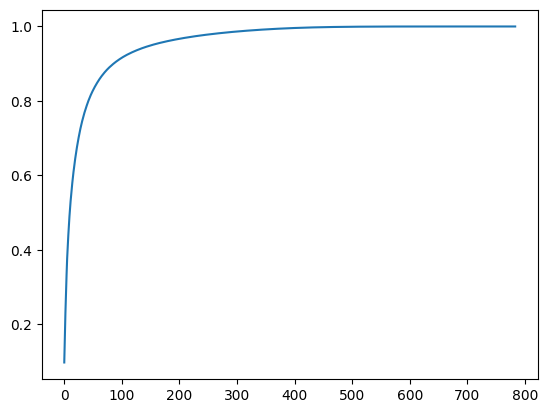

In [25]:
# Here we can see arount 200 values percentage goes 90%+, so n_components would be 200
plt.plot(np.cumsum(pca.explained_variance_ratio_))